<a href="https://colab.research.google.com/github/Shrinithi04/ARIMA-and-S-ARIMA-model-Implementation/blob/main/Arima_and_SARIMA_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub pandas numpy matplotlib statsmodels


In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")


In [ ]:
file_path = path + "/stocks/AAPL.csv"  # Using Apple stock data as an example
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

<ipython-input-18-cf8c078f141f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


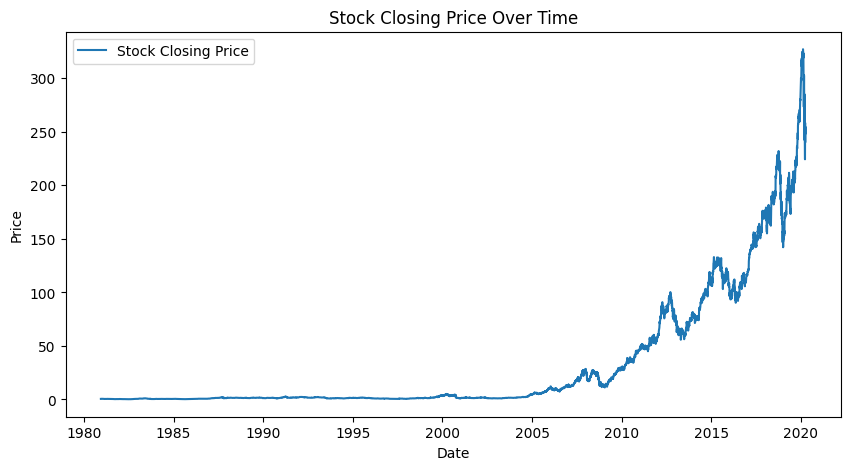

In [ ]:
df = df[['Close']]

# Handling missing values (if any)
df.dropna(inplace=True)

# Plot the closing price
plt.figure(figsize=(10,5))
plt.plot(df, label="Stock Closing Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differencing may be required.")

check_stationarity(df['Close'])


ADF Statistic: 1.8939738468260805
p-value: 0.9985182618845982
Data is NOT stationary. Differencing may be required.


In [ ]:
df_diff = df.diff().dropna()
check_stationarity(df_diff['Close'])


ADF Statistic: -15.355344806467862
p-value: 3.673144669580859e-28
Data is stationary.


In [ ]:
p, d, q = 3, 1, 3  # Adjust based on ACF/PACF analysis
model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [ ]:
forecast_steps = 30  # Predict next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for forecast
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


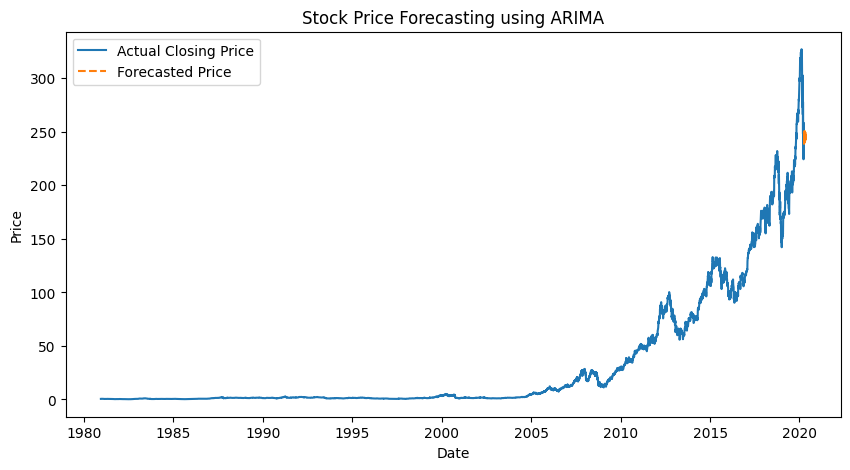

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Actual Closing Price")
plt.plot(future_dates, forecast, label="Forecasted Price", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Forecasting using ARIMA")
plt.legend()
plt.show()

In [ ]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': forecast})
print(forecast_df.head())

           Date  Forecasted Price
9909 2020-04-02        250.067677
9910 2020-04-03        238.785671
9911 2020-04-04        250.313809
9912 2020-04-05        240.699909
9913 2020-04-06        246.867379


**S-ARIMA**

In [ ]:
!pip uninstall -y numpy pmdarima
!pip install --no-cache-dir numpy pmdarima


Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip install --upgrade numpy==1.23.5
!pip install --upgrade pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you hav

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [ ]:
!pip install kagglehub pandas numpy matplotlib statsmodels pmdarima


In [ ]:
path = kagglehub.dataset_download("jayavarman/bike-sales-data-of-100k")



In [ ]:
# Load dataset (assuming it's a CSV inside the downloaded folder)
file_path = path + "/bike_sales_100k.csv"  # Adjust filename if needed
df = pd.read_csv(file_path)


In [ ]:
print(df.head())


   Sale_ID        Date  Customer_ID     Bike_Model    Price  Quantity  \
0        1  11-07-2022         9390        Cruiser   318.32         1   
1        2  03-05-2024         3374    Hybrid Bike  3093.47         4   
2        3  01-09-2022         2689   Folding Bike  4247.99         3   
3        4  28-09-2022         3797  Mountain Bike  1722.01         3   
4        5  05-01-2021         1633            BMX  3941.44         3   

  Store_Location  Salesperson_ID Payment_Method  Customer_Age Customer_Gender  
0   Philadelphia             589      Apple Pay            70          Female  
1        Chicago             390      Apple Pay            37            Male  
2    San Antonio             338         PayPal            59          Female  
3    San Antonio             352      Apple Pay            19            Male  
4   Philadelphia             580         PayPal            67          Female  


In [ ]:
df['Total_Sales'] = df['Price'] * df['Quantity']


In [ ]:
print(df.head())
print(df.dtypes)


   Sale_ID        Date  Customer_ID     Bike_Model    Price  Quantity  \
0        1  11-07-2022         9390        Cruiser   318.32         1   
1        2  03-05-2024         3374    Hybrid Bike  3093.47         4   
2        3  01-09-2022         2689   Folding Bike  4247.99         3   
3        4  28-09-2022         3797  Mountain Bike  1722.01         3   
4        5  05-01-2021         1633            BMX  3941.44         3   

  Store_Location  Salesperson_ID Payment_Method  Customer_Age Customer_Gender  \
0   Philadelphia             589      Apple Pay            70          Female   
1        Chicago             390      Apple Pay            37            Male   
2    San Antonio             338         PayPal            59          Female   
3    San Antonio             352      Apple Pay            19            Male   
4   Philadelphia             580         PayPal            67          Female   

   Total_Sales  
0       318.32  
1     12373.88  
2     12743.97  
3     

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Specify the correct formatx
df.set_index('Date', inplace=True)
df_daily = df.resample('D').sum()  # Resample data to daily sales


In [ ]:
print(df.columns)

Index(['Sale_ID', 'Date', 'Customer_ID', 'Bike_Model', 'Price', 'Quantity',
       'Store_Location', 'Salesperson_ID', 'Payment_Method', 'Customer_Age',
       'Customer_Gender', 'Total_Sales'],
      dtype='object')


In [ ]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differencing may be required.")

check_stationarity(df_daily['Total_Sales'])

ADF Statistic: -42.349159582218256
p-value: 0.0
Data is stationary.


In [ ]:
df_diff = df_daily['Total_Sales'].diff().dropna()
check_stationarity(df_diff)

ADF Statistic: -13.800135787907289
p-value: 8.602043808012237e-26
Data is stationary.


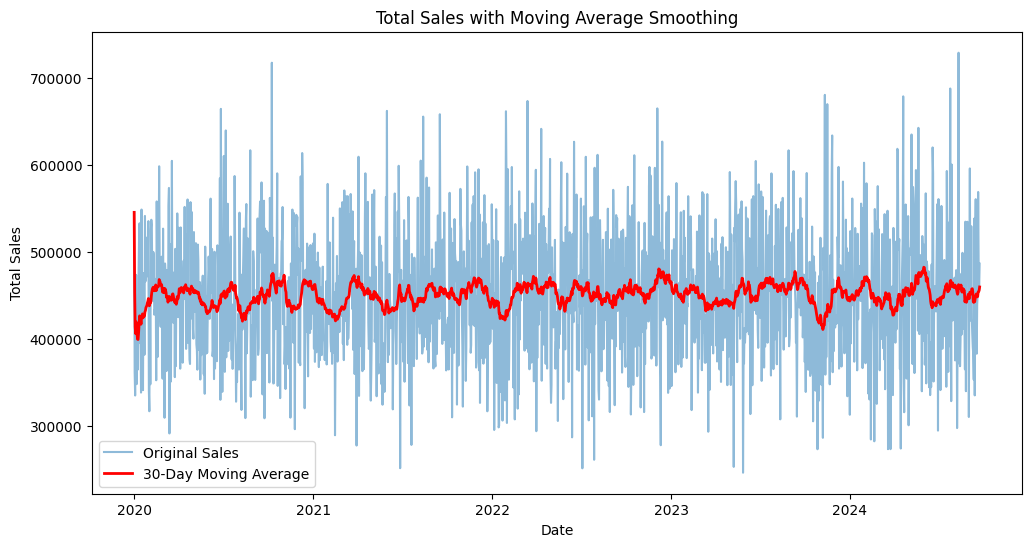

In [ ]:
import matplotlib.pyplot as plt

# Apply Moving Average (window = 30 days)
df_daily['Moving_Avg'] = df_daily['Total_Sales'].rolling(window=30, min_periods=1).mean()

# Plot Original vs Smoothed Data
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Total_Sales'], label='Original Sales', alpha=0.5)
plt.plot(df_daily.index, df_daily['Moving_Avg'], label='30-Day Moving Average', color='red', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales with Moving Average Smoothing")
plt.legend()
plt.show()


In [ ]:
auto_model = auto_arima(df_daily['Total_Sales'], seasonal=True, m=30, stepwise=True, trace=True)
p, d, q, P, D, Q, m = auto_model.order + auto_model.seasonal_order
print(f"Best SARIMA order: ({p},{d},{q}) x ({P},{D},{Q},{m})")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=inf, Time=58.77 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=43583.275, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=43586.579, Time=15.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=43586.536, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=49914.149, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[30] intercept   : AIC=43585.273, Time=2.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[30] intercept   : AIC=43585.164, Time=1.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[30] intercept   : AIC=43589.307, Time=27.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[30] intercept   : AIC=43584.630, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[30] intercept   : AIC=43584.639, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[30] intercept   : AIC=43586.625, Time=0.58 sec

Best model:  ARIMA(0,0,0)(0,0,0)[30] intercept
Total fit time: 109.679 seconds
Best SARIMA order: (0,0,0) x (0,0,0,30)


In [ ]:


 model = SARIMAX(df_daily['Total_Sales'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()


In [ ]:
forecast_steps = 30  # Predict next 30 days
forecast = model_fit.forecast(steps=forecast_steps)


In [ ]:
future_dates = pd.date_range(start=df_daily.index[-1], periods=forecast_steps+1, freq='D')[1:]


<ipython-input-46-76afcdc6655f>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



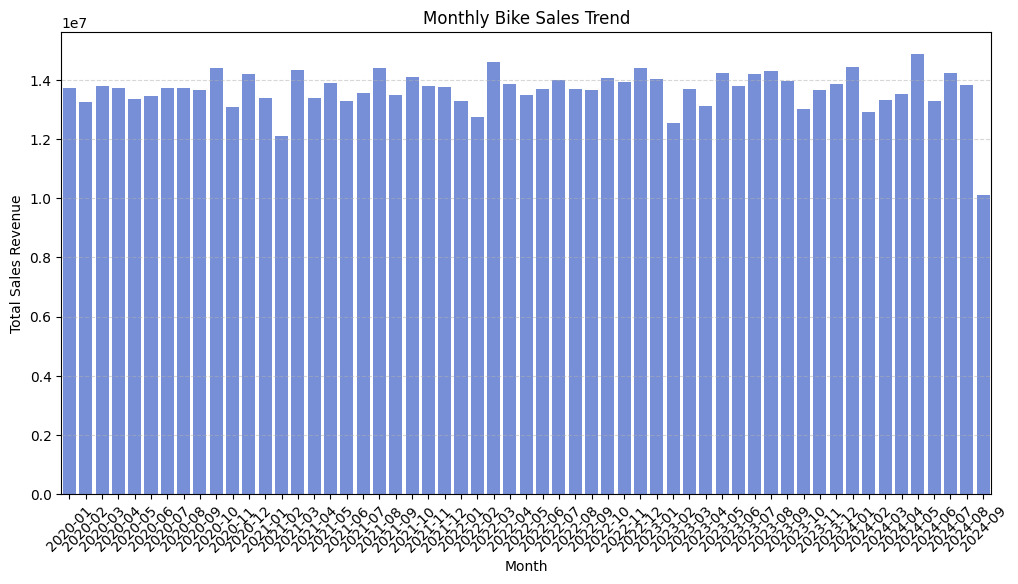

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resample to monthly sales
df_monthly = df_daily.resample('M').sum()
df_monthly.index = df_monthly.index.strftime('%Y-%m')  # Convert index to 'YYYY-MM' format

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_monthly.index, y=df_monthly['Total_Sales'], color="royalblue", alpha=0.8)

# Improve readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.title("Monthly Bike Sales Trend")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


In [ ]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': forecast})
print(forecast_df.head())

                 Date  Forecasted Sales
2024-09-23 2024-09-23               0.0
2024-09-24 2024-09-24               0.0
2024-09-25 2024-09-25               0.0
2024-09-26 2024-09-26               0.0
2024-09-27 2024-09-27               0.0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (start with parameters p=5, d=1, q=5; adjust after analysis)
arima_model = ARIMA(df_daily['Total_Sales'], order=(5, 1, 5))
arima_fit = arima_model.fit()

# Forecast next 30 days
arima_forecast = arima_fit.forecast(steps=30)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (adjust the order parameters as required)
sarima_model = SARIMAX(df_daily['Total_Sales'], order=(5, 1, 5), seasonal_order=(1, 1, 1, 30))  # Example
sarima_fit = sarima_model.fit()

# Forecast next 30 days
sarima_forecast = sarima_fit.forecast(steps=30)
